# Play with Fine Tuned CLIP Model

- get a checkpoint and apply some sentences.

In [2]:
# you might want to restart the kernel after installation is complete.
!pip install transformers evaluate docarray pillow datasets pycm ipywidgets jupyter evaluate jupyter_client --upgrade --quiet

In [3]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
from docarray import DocumentArray

import torch


checkpoint = "./checkpoints-15/checkpoint-60"
K = 4
NO_EMOJIS = 31

emojis_as_images = [Image.open(f"emojis/{i}.png") for i in range(NO_EMOJIS)]

processor = CLIPProcessor.from_pretrained(checkpoint)
model = CLIPModel.from_pretrained(checkpoint)


def get_emoji(text, model=model, processor=processor, emojis=emojis_as_images, K=4):
    inputs = processor(text=text, images=emojis_as_images, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)

    logits_per_text = outputs.logits_per_text
    # we take the softmax to get the label probabilities
    probs = logits_per_text.softmax(dim=1)
    # top K number of options
    predictions_suggestions_for_chunk = [torch.topk(prob, K).indices.tolist() for prob in probs][0]
    predictions_suggestions_for_chunk
    
    # plot predictions
    images = DocumentArray.from_files([f"emojis/{i}.png" for i in predictions_suggestions_for_chunk])
    images.plot_image_sprites()

/opt/conda/lib/python3.8/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


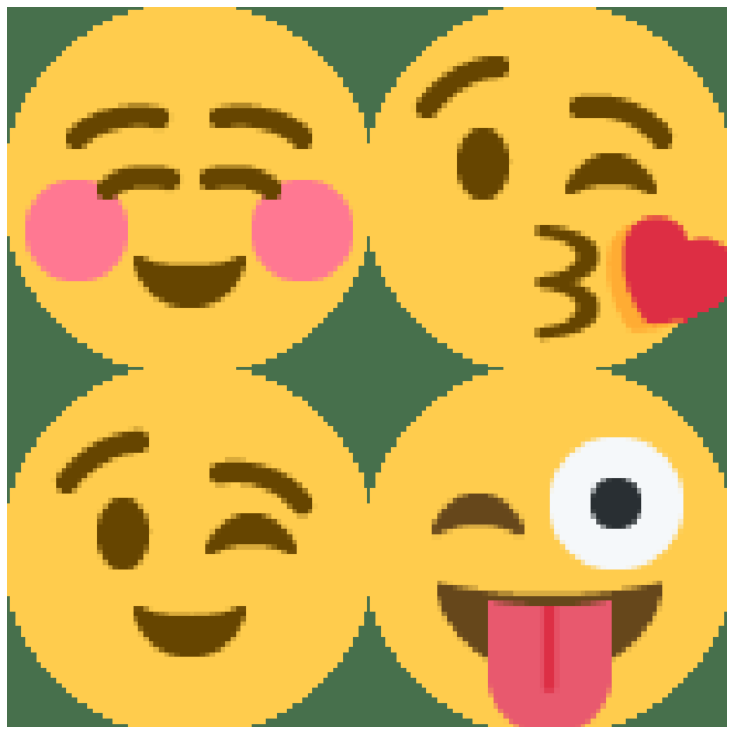

In [4]:
get_emoji(text="I'm so glad I finally arrived in my holiday resort!")

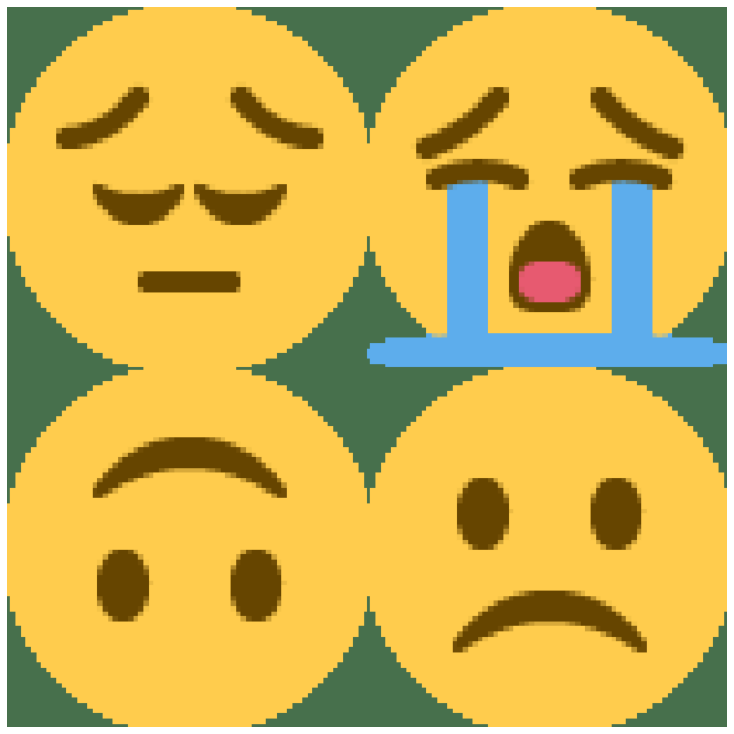

In [5]:
get_emoji(text="I'm feeling sad today")

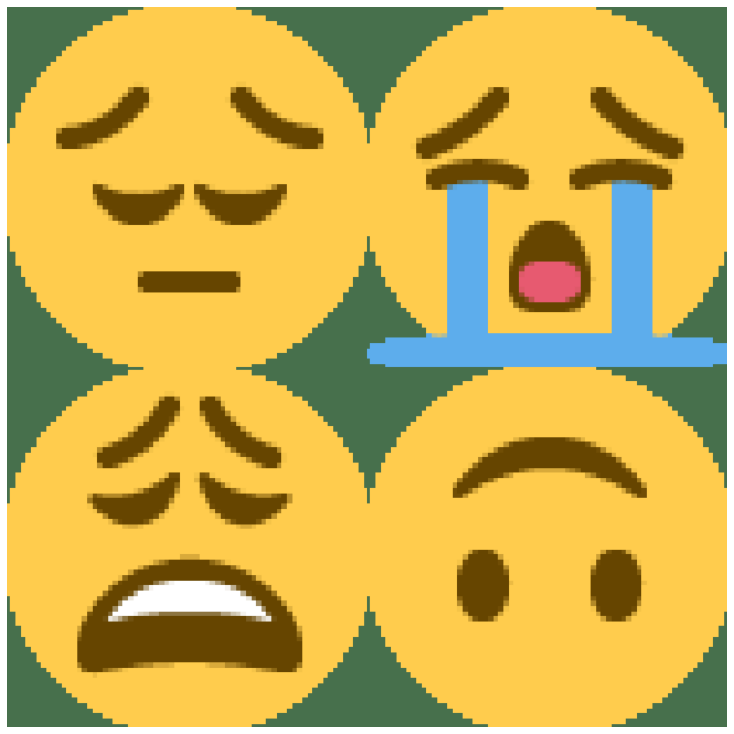

In [6]:
get_emoji(text="I'm dying")

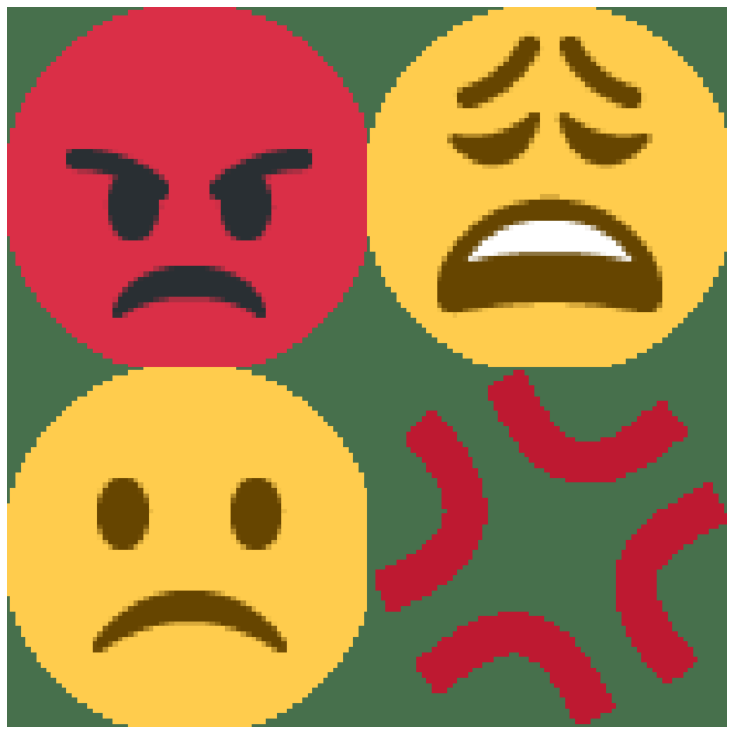

In [7]:
get_emoji(text="I hate this")

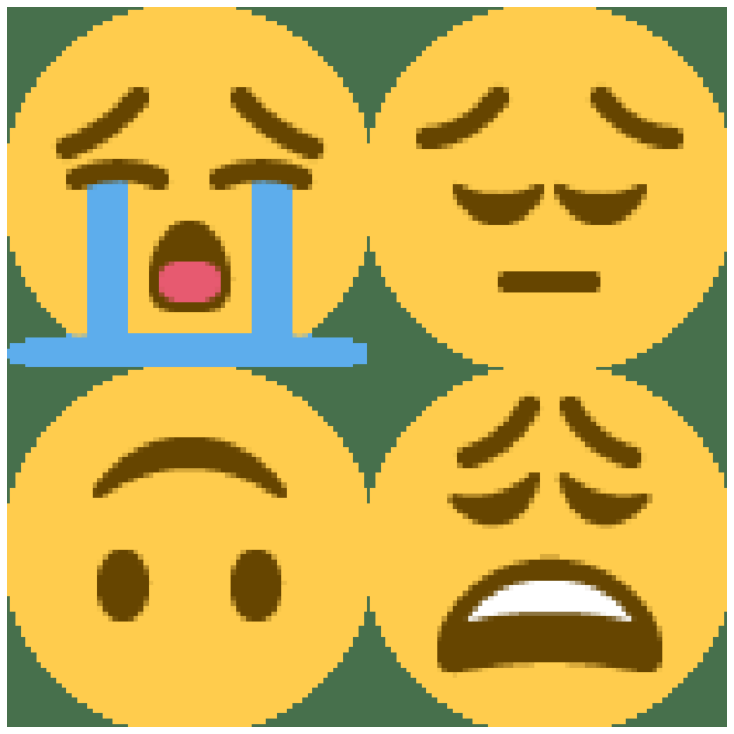

In [8]:
get_emoji(text="I am crying")

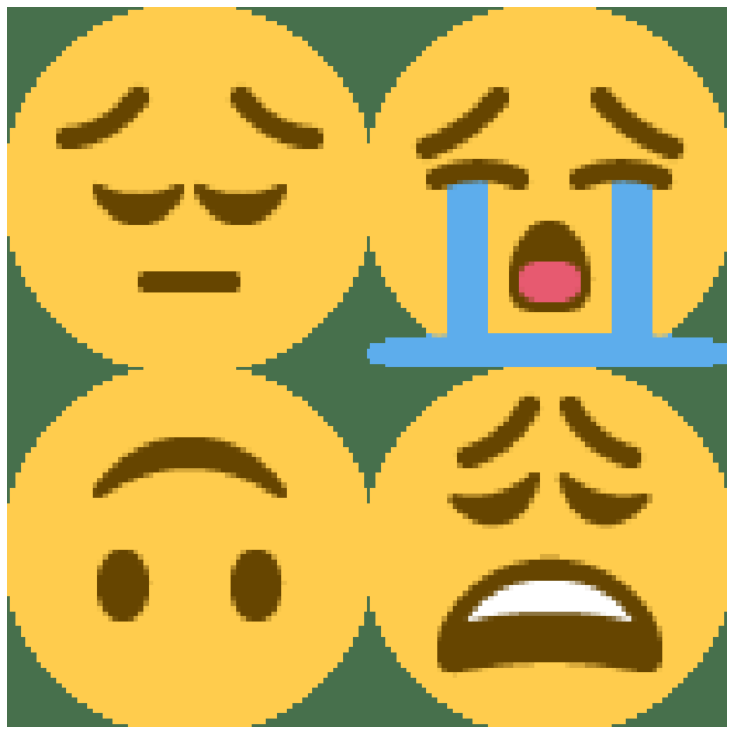

In [9]:
get_emoji(text="I am so depressed right now")